# LeR complete examples

## Short lensed/unlensed BBH example with three detectors

* This part of the notebook is a short example to simulate lensed and unlensed binary black hole mergers and calculate their rates ($yr^{-1}$) and finally compare the results.

In [1]:
# call the LeR class
from ler.rates import LeR

* class initialization
* if you want the models and its parameters to print.

    ```ler = LeR()```
    
* set 'npool' according to your machine's available CPU cores. Default is 4.
* to check no. of cores, 

    ```import multiprocessing as mp```
    
    ```print(mp.cpu_count())```

In [2]:
ler = LeR(verbose=False, create_new_interpolator=False)

### Simulation of the GW CBC population (unlensed).

* this will generate a json file with the simulated population parameters
* by default 100,000 events will be sampled with batches of 25,000. For more realistic results, keep batch_size=50000 and size=1000000.
* results will be saved in the same directory as json file.
* resume=True will resume the simulation from the last saved batch.
* if you dont't need to save each batch, set save_batch=False.

In [4]:
# ler.batch_size = 100000 # for faster computation
unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False, save_batch=False)

unlensed params will be store in ./unlensed_param.json
chosen batch size = 25000 with total size = 100000
There will be 4 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./unlensed_param.json...


### Calculation of unlensed rates

In [14]:
ler.unlensed_rate();

getting unlensed_params from json file ./unlensed_param.json...
total unlensed rate (yr^-1) (with step function): 436.8666235339314
number of simulated unlensed detectable events: 422
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./unlensed_param_detectable.json


### Simulation of the GW CBC population (lensed).

* this will generate a json file with the simulated source parameters, lensed parameters and image parameters.
* if the program hangs dues to memory issues,
  * try reducing the batch size.
  * and you can resume from the last saved batch.

In [9]:
# ler.batch_size = 50000
lensed_param = ler.lensed_cbc_statistics(size=100000, resume=False, save_batch=False)

lensed params will be store in ./lensed_param.json
chosen batch size = 25000 with total size = 100000
There will be 4 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2969.69it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2943.54it/s]


calculating snrs...
Batch no. 3
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2919.36it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2985.65it/s]


calculating snrs...
saving all lensed params in ./lensed_param.json...


* what are the saved files?

In [14]:
ler.json_file_names

{'ler_param': './ler_params.json',
 'unlensed_param': './unlensed_param.json',
 'unlensed_param_detectable': './unlensed_param_detectable.json',
 'lensed_param': './lensed_param.json',
 'lensed_param_detectable': './lensed_param_detectable.json'}

### Calculation of lensed rates

In [15]:
ler.lensed_rate();

getting lensed_params from json file ./lensed_param.json...
total lensed rate (yr^-1) (with step function): 1.1701057610525099
number of simulated lensed detectable events: 471
number of simulated all lensed events: 100000
storing detectable lensed params in ./lensed_param_detectable.json


### Comparison of the rates

In [16]:
ler.rate_ratio();

unlensed_rate: 436.8666235339314
lensed_rate: 1.1701057610525099
ratio: 373.35652731165936


* if you want to compare the rates, and compare it at the same time, run the following command.

    ```rate_ratio, unlensed_param_detectable, lensed_param_detectable =ler.rate_comparision_with_rate_calculation()```

* looking at the available parameters
* Note: This is for spin-less systems. IMRPhenomD (spin-less) is the default waveform approximant. To see LeR configuration, run

    ```ler.print_all_params()```

In [20]:
# getting generated parameters
unlensed_param_detectable = ler.unlensed_param_detectable
lensed_param_detectable = ler.lensed_param_detectable
print(unlensed_param_detectable.keys())
print(lensed_param_detectable.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])


* Note: all ler initialization parameters and results are saved in a json file.

In [21]:
from ler.utils import load_json
ler_params = load_json('./ler_params.json')
print(ler_params.keys())
print("detectable_unlensed_rate_per_year: ", ler_params['detectable_unlensed_rate_per_year'])
print("detectable_lensed_rate_per_year; ",ler_params['detectable_lensed_rate_per_year'])
print("rate_ratio: ",ler_params['rate_ratio'])

dict_keys(['npool', 'z_min', 'z_max', 'size', 'batch_size', 'cosmology', 'snr_finder', 'json_file_names', 'directory', 'gw_param_sampler_dict', 'snr_calculator_dict', 'detectable_lensed_rate_per_year', 'detectability_condition', 'detectable_unlensed_rate_per_year', 'rate_ratio'])
detectable_unlensed_rate_per_year:  436.8666235339314
detectable_lensed_rate_per_year;  1.1701057610525099
rate_ratio:  373.35652731165936


getting gw_params from json file ./unlensed_param_detectable.json...
getting gw_params from json file ./unlensed_param.json...
getting gw_params from json file ./lensed_param_detectable.json...
getting gw_params from json file ./lensed_param.json...


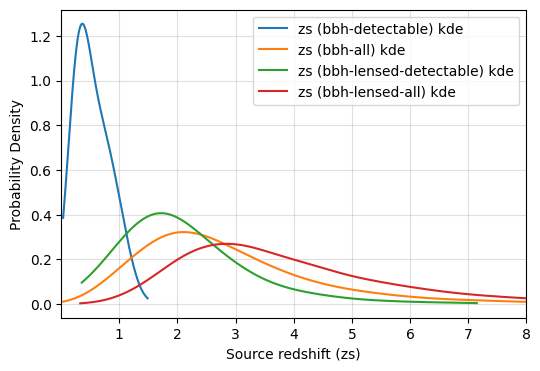

In [23]:
# quick plot
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# plotting the distribution of event parameters
# comparision of redshift distribution for lensed and unlensed events
# param_dict can be either a dictionary or a json file name that contains the parameters
plt.figure(figsize=(6, 4))
# for unlensed case
lerplt.param_plot(
    param_name='zs',
    param_dict='./unlensed_param_detectable.json',
    plot_label='zs (bbh-detectable)',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='./unlensed_param.json',
    plot_label='zs (bbh-all)',
    histogram=False,
    kde=True,
)
# for lensed case
lerplt.param_plot(
    param_name='zs',
    param_dict='./lensed_param_detectable.json',
    plot_label='zs (bbh-lensed-detectable)',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='./lensed_param.json',
    plot_label='zs (bbh-lensed-all)',
    histogram=False,
    kde=True,
)
plt.xlim(0.001,8)
plt.grid(alpha=0.4)
plt.xlabel('Source redshift (zs)')
plt.ylabel('Probability Density')
plt.show()

## Custom functions

* `ler` allows internal model functions to be change with custom functions.

* It also allows to change the default parameters of the existing model functions.

In [1]:
# First let's look at what are the input parameters available for ler.LeR
# The input paramters can divided into five categories
# 1. ler.LeR set up params
# 2. ler.CBCSourceParameterDistribution set up params (as kwargs)
# 3. ler.LensGalaxyParameterDistribution set up params (as kwargs)
# 4. ler.ImageProperties set up params (as kwargs)
# 5. gwsnr.GWSNR set up params (as kwargs)
import matplotlib.pyplot as plt
from ler.rates import LeR
ler = LeR(npool=4, verbose=True)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_5.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_ewoud interpolator will be load

As an example, I will change,

  * merger_rate_density_params's default value of **local merger rate density** ($R_0$) to 2.3e-9 $Mpc^{-3} yr^{-1}$. But, I am still using the default merger_rate_density function, which is 'merger_rate_density_bbh_popI_II_oguri2018'.

  * **source_frame_masses** to a custom function. This is similar to the internal default function, i.e. PowerLaw+Peak model. I am using `gwcosmo`'s powerlaw_gaussian prior for this example.

  * **optical depth** for strong lensing condition and **velocity dispersion** of the lensing galaxy to SIS model and gamma function respectively. The default optical depth is for the SIE model and default velocity dispersion has additional redshift dependence.
  
  * `gwsnr` parameters: By default, it uses 'IMRPhenomD' **waveform model** with no spin. It uses interpolation method to find the 'snr' and it is super fast. But for the example below, I am using 'IMRPhenomXPHM` with precessing spins. This is without interpolation but through inner product method. It will be slower.

In [3]:
from gwcosmo import priors as p

# define your custom function of mass_1_source and mass_2_source calculation
# all ler internal functions are defined in a similar way
def powerlaw_peak(size, mminbh=4.98, mmaxbh=86.22, alpha=2.63, mu_g=33.07, sigma_g=5.69, lambda_peak=0.10, delta_m=4.82, beta=1.26, param=None):
    """
    Function to sample mass1 and mass2 from a powerlaw with a gaussian peak

    Parameters
    ----------
    size : `int`
        Number of samples to draw
    mminbh : `float`
        Minimum mass of the black hole (Msun)
        default: 4.98
    mmaxbh : `float`
        Maximum mass of the black hole (Msun)
        default: 86.22
    alpha : `float`
        Spectral index for the powerlaw of the primary mass distribution
        default: 2.63
    mu_g : `float`
        Mean of the Gaussian component in the primary mass distribution
        default: 33.07
    sigma_g : `float`
        Width of the Gaussian component in the primary mass distribution
        default: 5.69
    lambda_peak : `float`
        Fraction of the model in the Gaussian component
        default: 0.10
    delta_m : `float`
        Range of mass tapering on the lower end of the mass distribution
        default: 4.82
    beta : `float`
        Spectral index for the powerlaw of the mass ratio distribution
        default: 1.26
    param : `dict`
        Dictionary of parameters for the model. This will override the above.
    """

    if param:
        mminbh = param['mminbh']
        mmaxbh = param['mmaxbh']
        alpha = param['alpha']
        mu_g = param['mu_g']
        sigma_g = param['sigma_g']
        lambda_peak = param['lambda_peak']
        delta_m = param['delta_m']
        beta = param['beta']

    model = p.BBH_powerlaw_gaussian(
        mminbh=mminbh,
        mmaxbh=mmaxbh,
        alpha=alpha,
        mu_g=mu_g,
        sigma_g=sigma_g,
        lambda_peak=lambda_peak,
        delta_m=delta_m,
        beta=beta,
    )
    # sample mass1 and mass2
    mass_1_source, mass_2_source = model.sample(Nsample=size)

    return (mass_1_source, mass_2_source)

In [5]:
# Initialize the class with the custom function
# changing ler input params
ler = LeR(npool=4, verbose=False,
    # for source parameters  
    source_priors=dict(
        merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
        source_frame_masses=powerlaw_peak,
    ),
    source_priors_params=dict(
        merger_rate_density=dict(
            R0=2.9e-08,
            b2=1.6,
            b3=2.0,
            b4=30
        ),
        source_frame_masses=dict(
            mminbh=4.98,
            mmaxbh=86.22,
            alpha=2.63,
            mu_g=33.07,
            sigma_g=5.69,
            lambda_peak=0.10,
            delta_m=4.82,
            beta=1.26
        ),
    ),
    # for lens parameters
    lens_functions=dict(
        strong_lensing_condition="rjs_with_cross_section_SIS",
        optical_depth="optical_depth_SIS_haris",
    ),
    lens_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",
    ),
    lens_priors_params=dict(
        velocity_dispersion=dict(a=2.32 / 2.67, c=2.67)
    ),
    # for snr generation
    waveform_approximant = 'IMRPhenomXPHM',
    snr_type='inner_product',
    spin_zero=False,
    spin_precession=True,
)

In [14]:
ler = LeR(npool=6, verbose=False, nsamples_mtot=200, nsamples_mass_ratio=500,
    source_priors=dict(
        source_frame_masses="binary_masses_BBH_popI_II_powerlaw_gaussian"
    ),
    source_priors_params=dict(
        source_frame_masses=dict(
            mminbh=4.98,
            mmaxbh=86.22,
            alpha=2.63,
            mu_g=33.07,
            sigma_g=5.69,
            lambda_peak=0.10,
            delta_m=4.82,
            beta=1.26
        )
    ),
    lens_functions=dict(
        strong_lensing_condition="rjs_with_cross_section_SIS",
        optical_depth="optical_depth_SIS_haris",
    ),
    lens_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",
    ),
    lens_priors_params=dict(
        velocity_dispersion=dict(a=2.32 / 2.67, c=2.67)
    ),
)

In [7]:
# simulation of the unlensed CBC population
# you can set the batch size at the LeR initialization
# or you can set it using the `batch_size` instance variable
# if the sample size is large, it is recommended to set the batch size to a large number, but it will consume more RAM memory or simply your machine's individual core won't be able to handle it.
ler.batch_size = 50000
ler.unlensed_cbc_statistics(size=100000, resume=True, output_jsonfile = './new_unlensed_params.json');

chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
resuming from ./new_unlensed_params.json
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40809/40809 [00:54<00:00, 750.80it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40712/40712 [00:54<00:00, 745.62it/s]


In [9]:
# simulation of the GW CBC population (lensed).
# this will generate a json file with the simulated source parameters, lensed parameters and image parameters.
# if the program hangs dues to memory issues,
# 1. try reducing the batch size.
# 2. and you can resume from the last saved batch.
ler.lensed_cbc_statistics(size=100000, resume=True, output_jsonfile = './new_lensed_params.json');

chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
resuming from ./new_lensed_params.json


In [10]:
# Note: you can also also called the generate parameters using an instance attribute. This instance attribute gets the dict from the json file generated above.
# Note: This is for spin-precessing systems, and it will contain extra (spin-related) parameters.
unlensed_param = ler.unlensed_param
print(unlensed_param.keys())
lensed_param = ler.lensed_param
print(lensed_param.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'optimal_snr_net', 'L1', 'H1', 'V1'])


In [11]:
# generate detectable events and compute the rate ratio
# note: here no input params are provided, so it will track the json files generated above
# For individual rate computation, use
# >>> ler.unlensed_rate();
# >>> ler.lensed_rate();
rate_ratio, unlensed_param_detectable, lensed_param_detectable =ler.rate_comparision_with_rate_calculation(
    unlensed_param='./new_unlensed_params.json',
    snr_threshold_unlensed=8.0,
    lensed_param='./new_lensed_params.json',
    output_jsonfile_unlensed='./new_unlensed_params_detectable.json',
    output_jsonfile_lensed='./new_lensed_params_detectable.json',
    snr_threshold_lensed=[8.0,8.0],
    num_img=[1,1],
)

getting unlensed_params from json file ./new_unlensed_params.json...
total unlensed rate (yr^-1) (with step function): 880.9798498279042
storing detectable unlensed params in ./new_unlensed_params_detectable.json
getting lensed_params from json file ./new_lensed_params.json...
total lensed rate (yr^-1) (with step function): 0.6287065084983634
storing detectable lensed params in ./new_lensed_params_detectable.json
unlensed_rate: 880.9798498279042
lensed_rate: 0.6287065084983634
ratio: 1401.2577218773893


**Important Note:**
* input parameters, snr_threshold_lensed=[8.0,8.0], num_img=[1,1], means that two of the images should have snr>8.0. You can also set: snr_threshold_lensed=8, num_img=2

* Similarly, if snr_threshold_lensed=[8.0,6.0], num_img=[2,2], it means that two of the images should have snr>8.0 and other two images should have snr>6.0. But in this case, even though the simulated lensed (detectable) events are correct, the rate calculation will not be right as the strong lensing condition was set for 2 image case.

In [12]:
# to check all the stored json file names
ler.json_file_names

{'ler_param': './ler_params.json',
 'unlensed_param': './new_unlensed_params.json',
 'unlensed_param_detectable': './new_unlensed_params_detectable.json',
 'lensed_param': './new_lensed_params.json',
 'lensed_param_detectable': './new_lensed_params_detectable.json'}

In [13]:
# again you can call the generated detectable events' parameters using an instance attribute
# Note: The data is not stored in this instance attribute, it is stored in the json file. This scheme is used to save RAM memory.
unlensed_param_detectable = ler.unlensed_param_detectable
print(unlensed_param_detectable.keys())
lensed_param_detectable = ler.lensed_param_detectable
print(lensed_param_detectable.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'optimal_snr_net', 'L1', 'H1', 'V1'])


### How to look for available model functions?

In [15]:
# All available names are stored as a dict in ler instance
# the keys of this dict shows the parameter type
# the values are also dict, where the keys are the model function names and the values are their input parameters

# for unlensed case
print(ler.available_gw_prior_list_and_its_params['source_frame_masses'])
# for lensed case
print(ler.available_lens_prior_list_and_its_params['velocity_dispersion'])

{'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81}, 'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0, 'sigma': 0.3, 'beta': 1.1}, 'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0, 'sigma': 0.3, 'beta': 1.1}, 'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0}, 'binary_masses_BNS_bimodal': {'w': 0.643, 'muL': 1.352, 'sigmaL': 0.08, 'muR': 1.88, 'sigmaR': 0.3, 'mmin': 1.0, 'mmax': 2.3}}
{'velocity_dispersion_haris': {'a': 0.8689138576779026, 'c': 2.67}, 'velocity_dispersion_gengamma': {'a': 0.8689138576779026, 'c': 2.67}, 'velocity_dispersion_bernardi': None, 'velocity_dispersion_ewoud': None}


In [19]:
# for looking at the choosen models and its input parameters

# for unlensed case
print(ler.gw_param_samplers)
print(ler.gw_param_samplers_params)
# for lensed case
print(ler.lens_param_samplers)
print(ler.lens_param_samplers_params)

{'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': <function powerlaw_peak at 0x2a85e6d40>, 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine', 'a_1': 'sampler_uniform', 'a_2': 'sampler_uniform', 'tilt_1': 'sampler_sine', 'tilt_2': 'sampler_sine', 'phi_12': 'sampler_uniform', 'phi_jl': 'sampler_uniform'}
{'merger_rate_density': {'R0': 2.9e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'source_frame_masses': {'mminbh': 4.98, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.1, 'delta_m': 4.82, 'beta': 1.26}, 'zs': None, 'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 'dec': None, 'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 'theta_jn': None, 'a_1': {'min_': 0.0, 'max_':

## Using internal model functions

In [20]:
# calling the default mass distribution model
mass_1_source, mass_2_source = ler.binary_masses_BBH_popI_II_powerlaw_gaussian(size=10000)
default_model = dict(mass_1_source=mass_1_source)

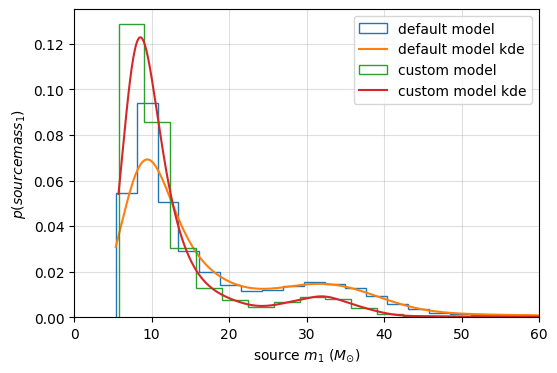

In [24]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# let's do a comparision plot between you custom model and the default model
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=unlensed_param, # or the json file name
    plot_label='default model',
);
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=default_model,
    plot_label='custom model',
);
plt.xlabel(r'source $m_1$ ($M_{\odot}$)')
plt.ylabel(r'$p(source mass_1)$')
plt.xlim(0,60)
plt.grid(alpha=0.4)
plt.show()

In [41]:
# comparing axis-ratio internally available models
size = 10000
padilla_strauss = ler.axis_ratio_padilla_strauss(size=size)

# axis_ratio_rayleigh depends on the velocity dispersion
# 
sigma = ler.velocity_dispersion_gengamma(size=size)
rayleigh = ler.axis_ratio_rayleigh(sigma=sigma)

# make a dict
axis_ratio_dict = dict(
    padilla_strauss=padilla_strauss,
    rayleigh=rayleigh,
)


axis_ratio_spline_coeff interpolator will be generated at ./interpolator_pickle/axis_ratio/axis_ratio_spline_coeff_0.pickle
axis_ratio interpolator will be loaded from ./interpolator_pickle/axis_ratio/axis_ratio_1.pickle


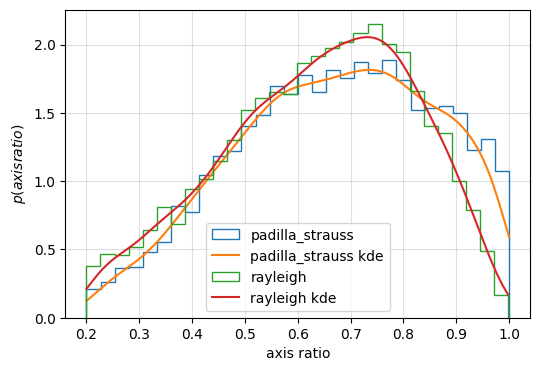

In [42]:
# plot the distribution of axis-ratio
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="padilla_strauss",
    param_dict=axis_ratio_dict,
    plot_label='padilla_strauss',
)
lerplt.param_plot(
    param_name="rayleigh",
    param_dict=axis_ratio_dict,
    plot_label='rayleigh',
)
plt.xlabel(r'axis ratio')
plt.ylabel(r'$p(axis ratio)$')
plt.grid(alpha=0.4)
plt.show()

## Selecting particular number of detectable events

In [1]:
from ler.rates import LeR

# class initialization
ler = LeR(verbose=False)

In [5]:
# for unlensed case
n_size_unlensed_param = ler.selecting_n_unlensed_detectable_events(
    size=200, 
    snr_threshold=8.0,
    batch_size=25000,
    output_jsonfile='./unlensed_params_n_detectable.json'
    )

collected number of events =  0
collected number of events =  129
collected number of events =  215
trmming final result to size=200


In [4]:
# for lensed case
# 2 super-threshold and 1 sub-threshold images
n_size_lensed_param = ler.selecting_n_lensed_detectable_events(
    size=200, 
    snr_threshold=[8.0,6.0],
    num_img=[2,1],
    batch_size=25000,
    output_jsonfile='./unlensed_params_n_detectable.json'
    )

collected number of events =  0


100%|███████████████████████████████████████████████████████| 25000/25000 [00:07<00:00, 3142.56it/s]


collected number of events =  62


100%|███████████████████████████████████████████████████████| 25000/25000 [00:07<00:00, 3351.38it/s]


collected number of events =  122


100%|███████████████████████████████████████████████████████| 25000/25000 [00:07<00:00, 3437.18it/s]


collected number of events =  185


100%|███████████████████████████████████████████████████████| 25000/25000 [00:07<00:00, 3452.77it/s]


collected number of events =  250
trmming final result to size=200


In [6]:
print(n_size_lensed_param.keys())
print(f"size of each parameters={len(n_size_lensed_param['zl'])}")

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'optimal_snr_net', 'L1', 'H1', 'V1'])
size of each parameters=200
